Two nodes of a binary tree are cousins if they have the same depth with different parents.

https://leetcode.com/problems/cousins-in-binary-tree/description/

In [ ]:
class Solution {
public:
    void f(TreeNode* node, int k, TreeNode* tmpPar, TreeNode*& par, int &len, int tmpLen){
        if(!node) return;
        tmpLen++;
        if(node->val==k){
            par=tmpPar;
            len=tmpLen;
            return;
        }
        f(node->left,k,node,par,len,tmpLen+1);
        f(node->right,k,node,par,len,tmpLen+1);
    }


    bool isCousins(TreeNode* root, int x, int y) {
        int lenX=0,lenY=0;
        TreeNode* parX=nullptr;
        f(root,x,nullptr,parX,lenX,0);
        TreeNode* parY=nullptr;
        f(root,y,nullptr,parY,lenY,0);
        if((parX and parY) and (parX!=root and parY!=root) and (parX!=parY and lenX==lenY)){
            return 1;
        }
        return 0;
    }
};

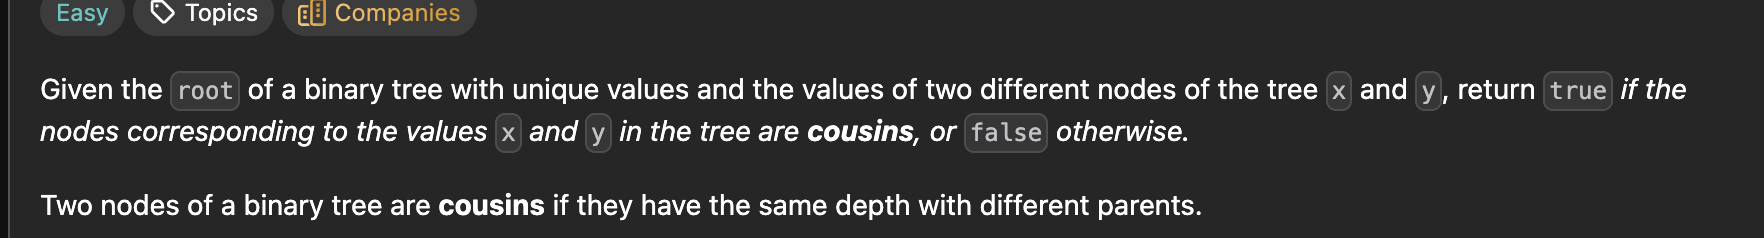

https://leetcode.com/problems/cousins-in-binary-tree-ii/description/

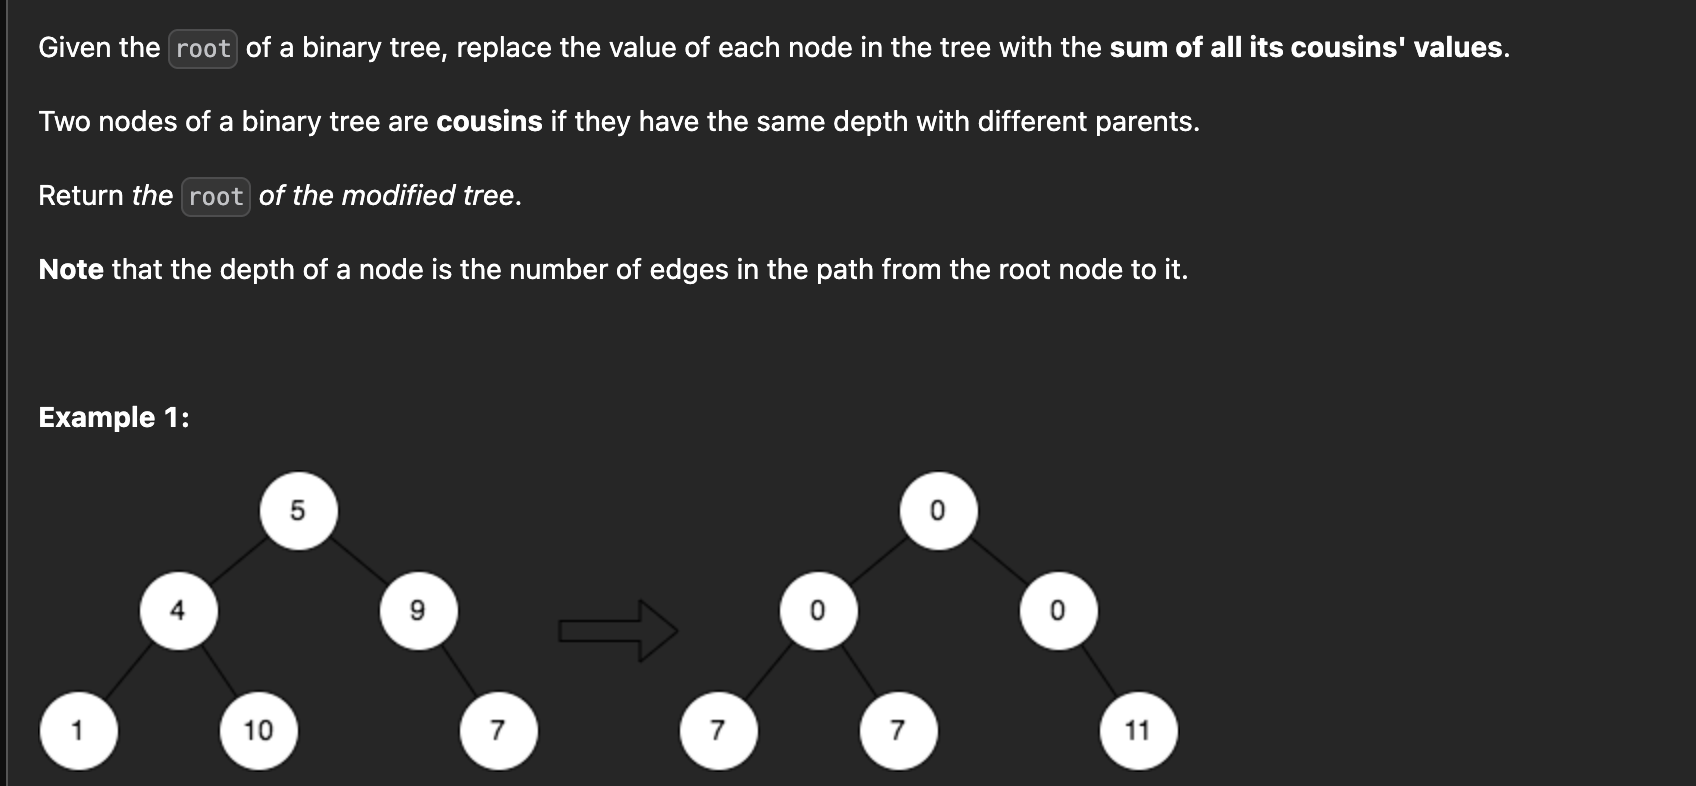

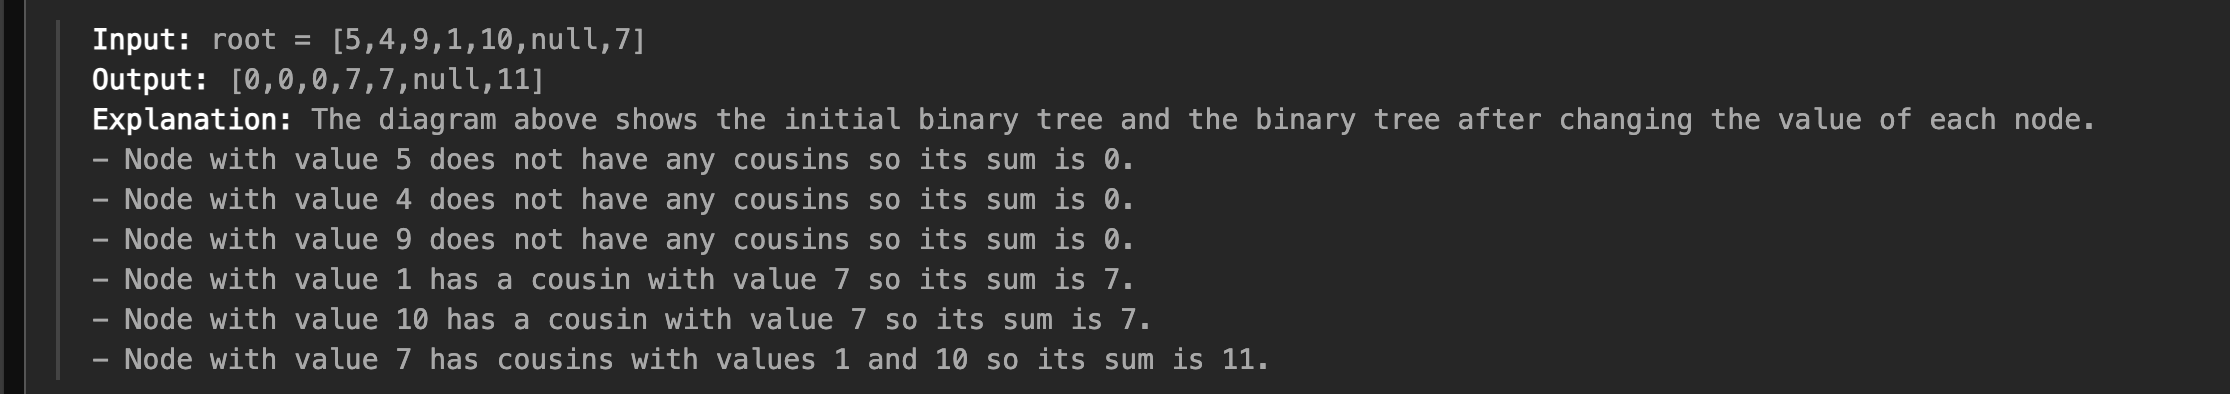

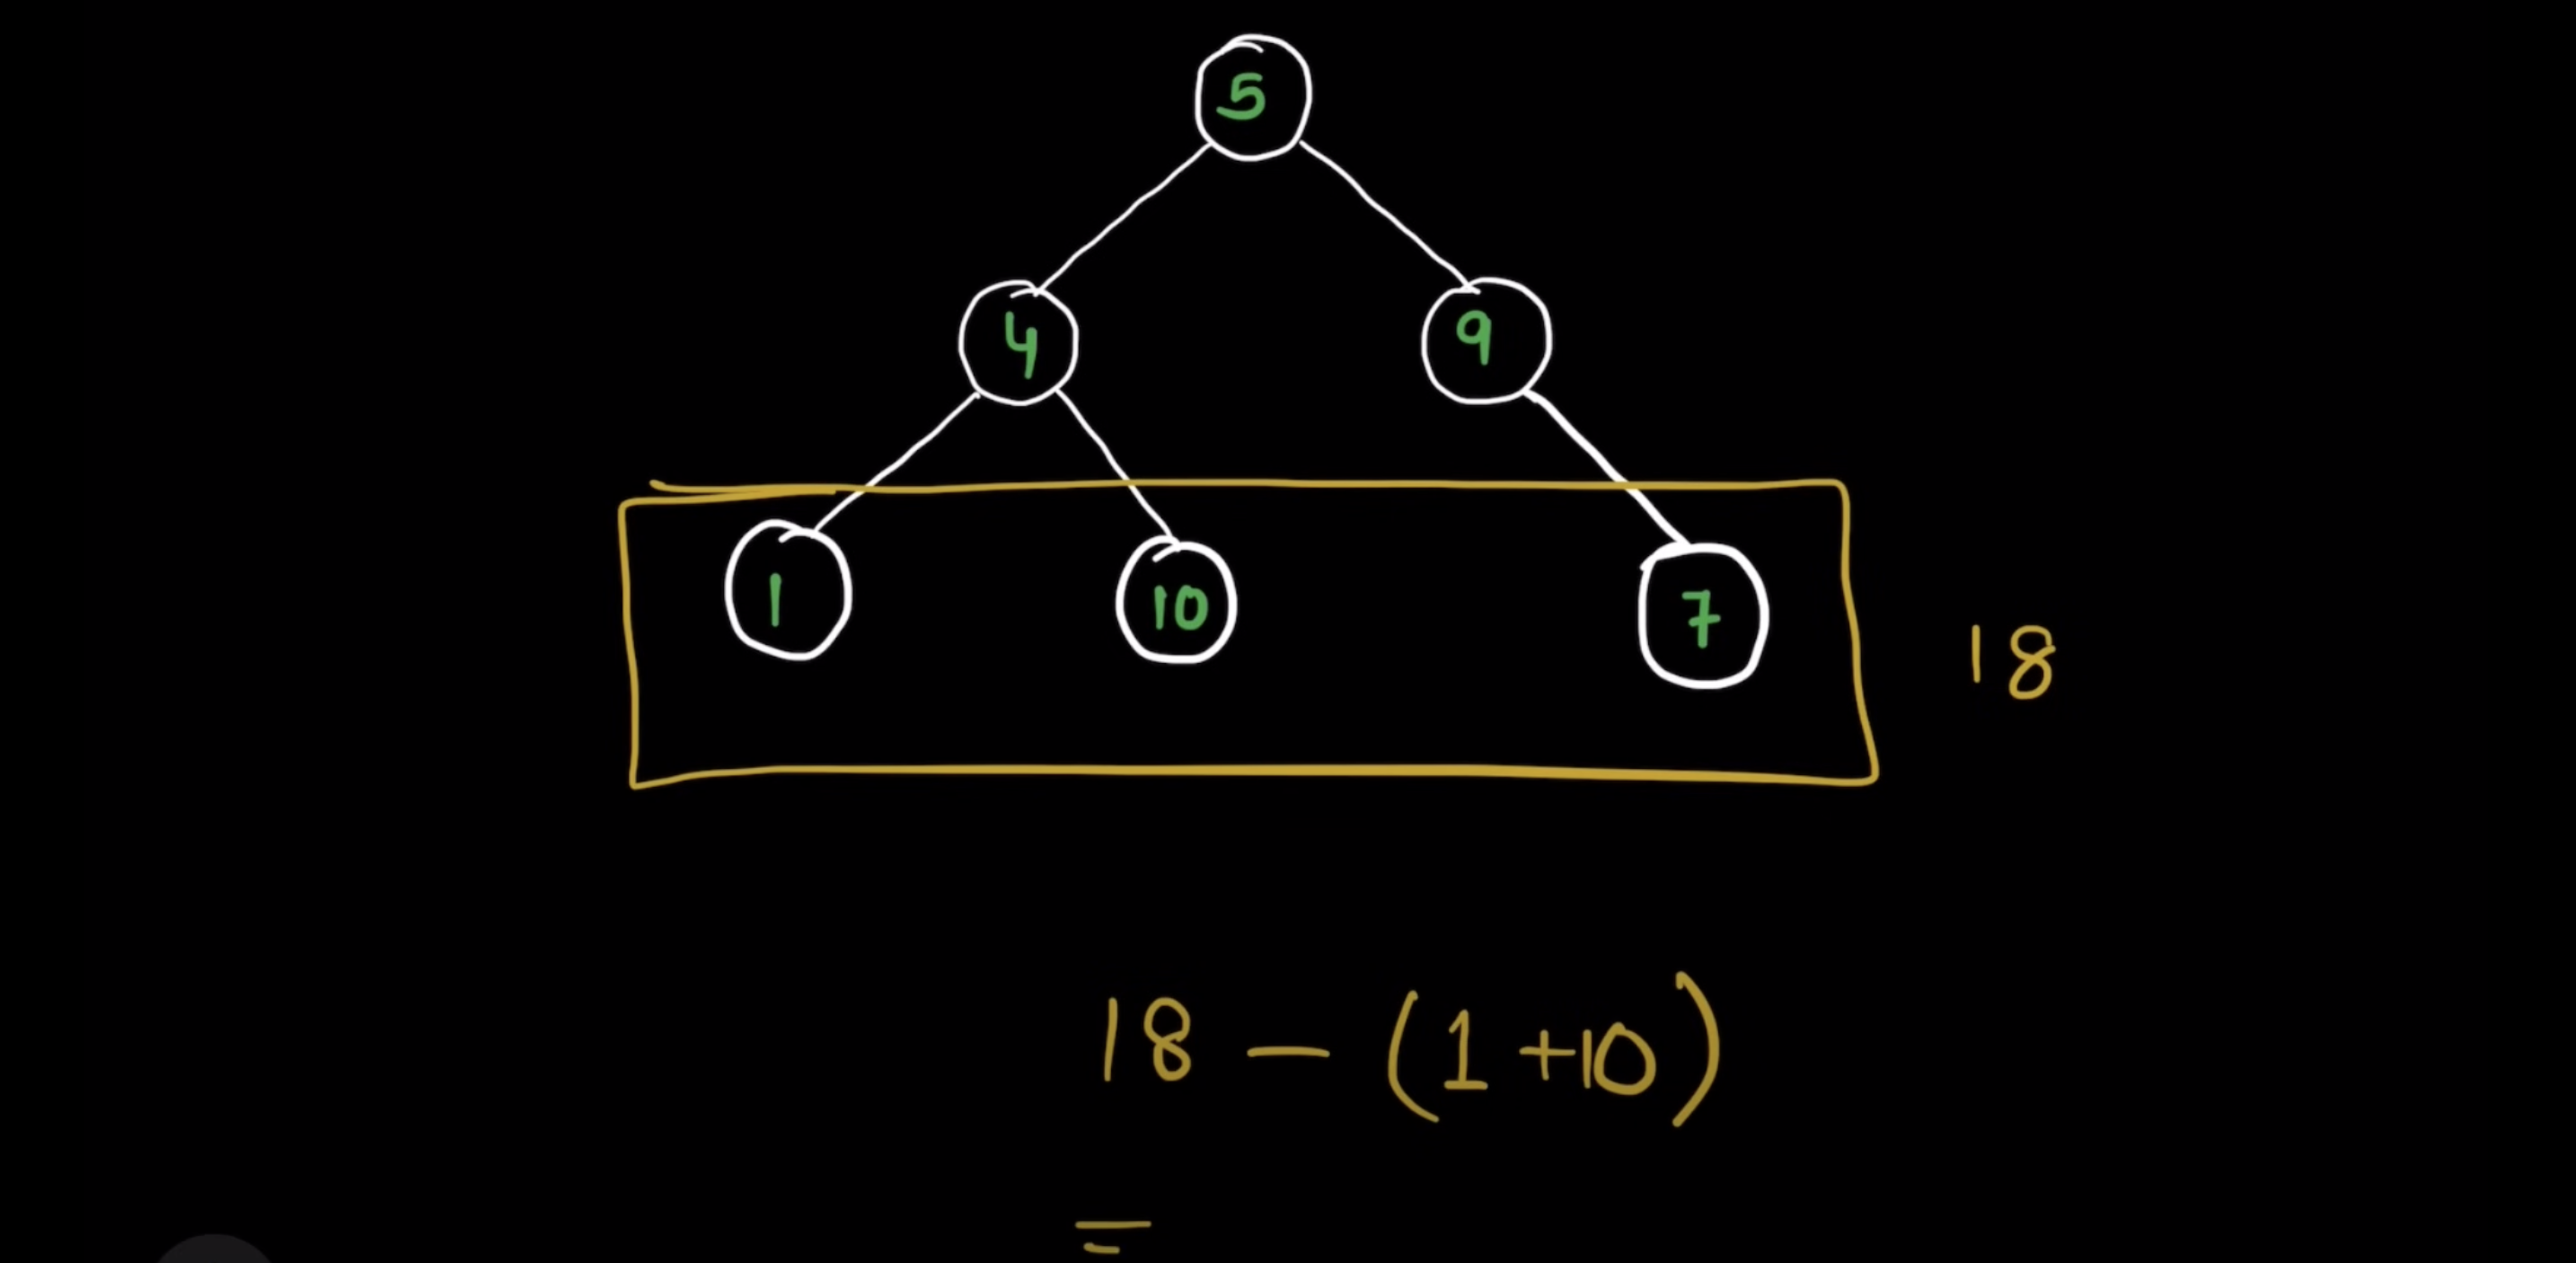

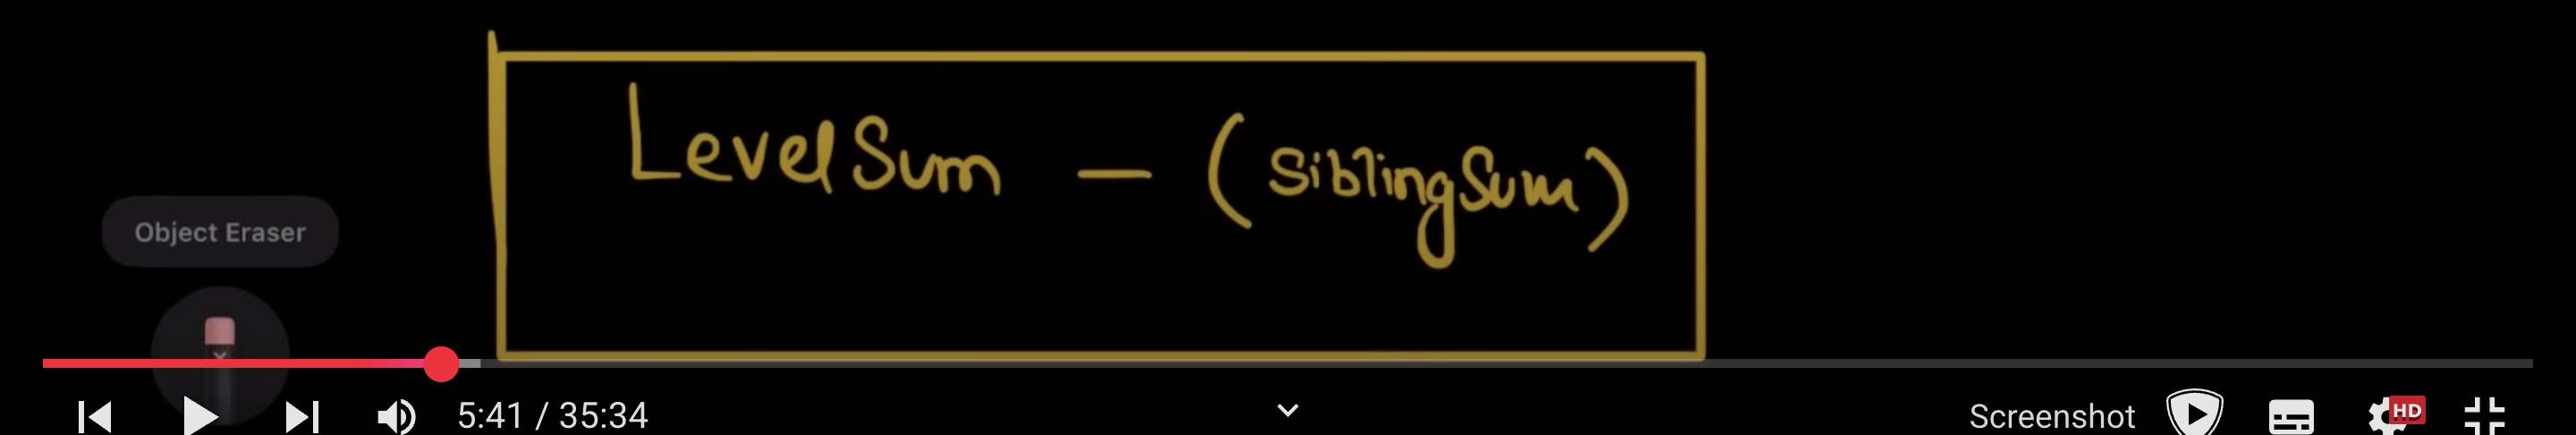

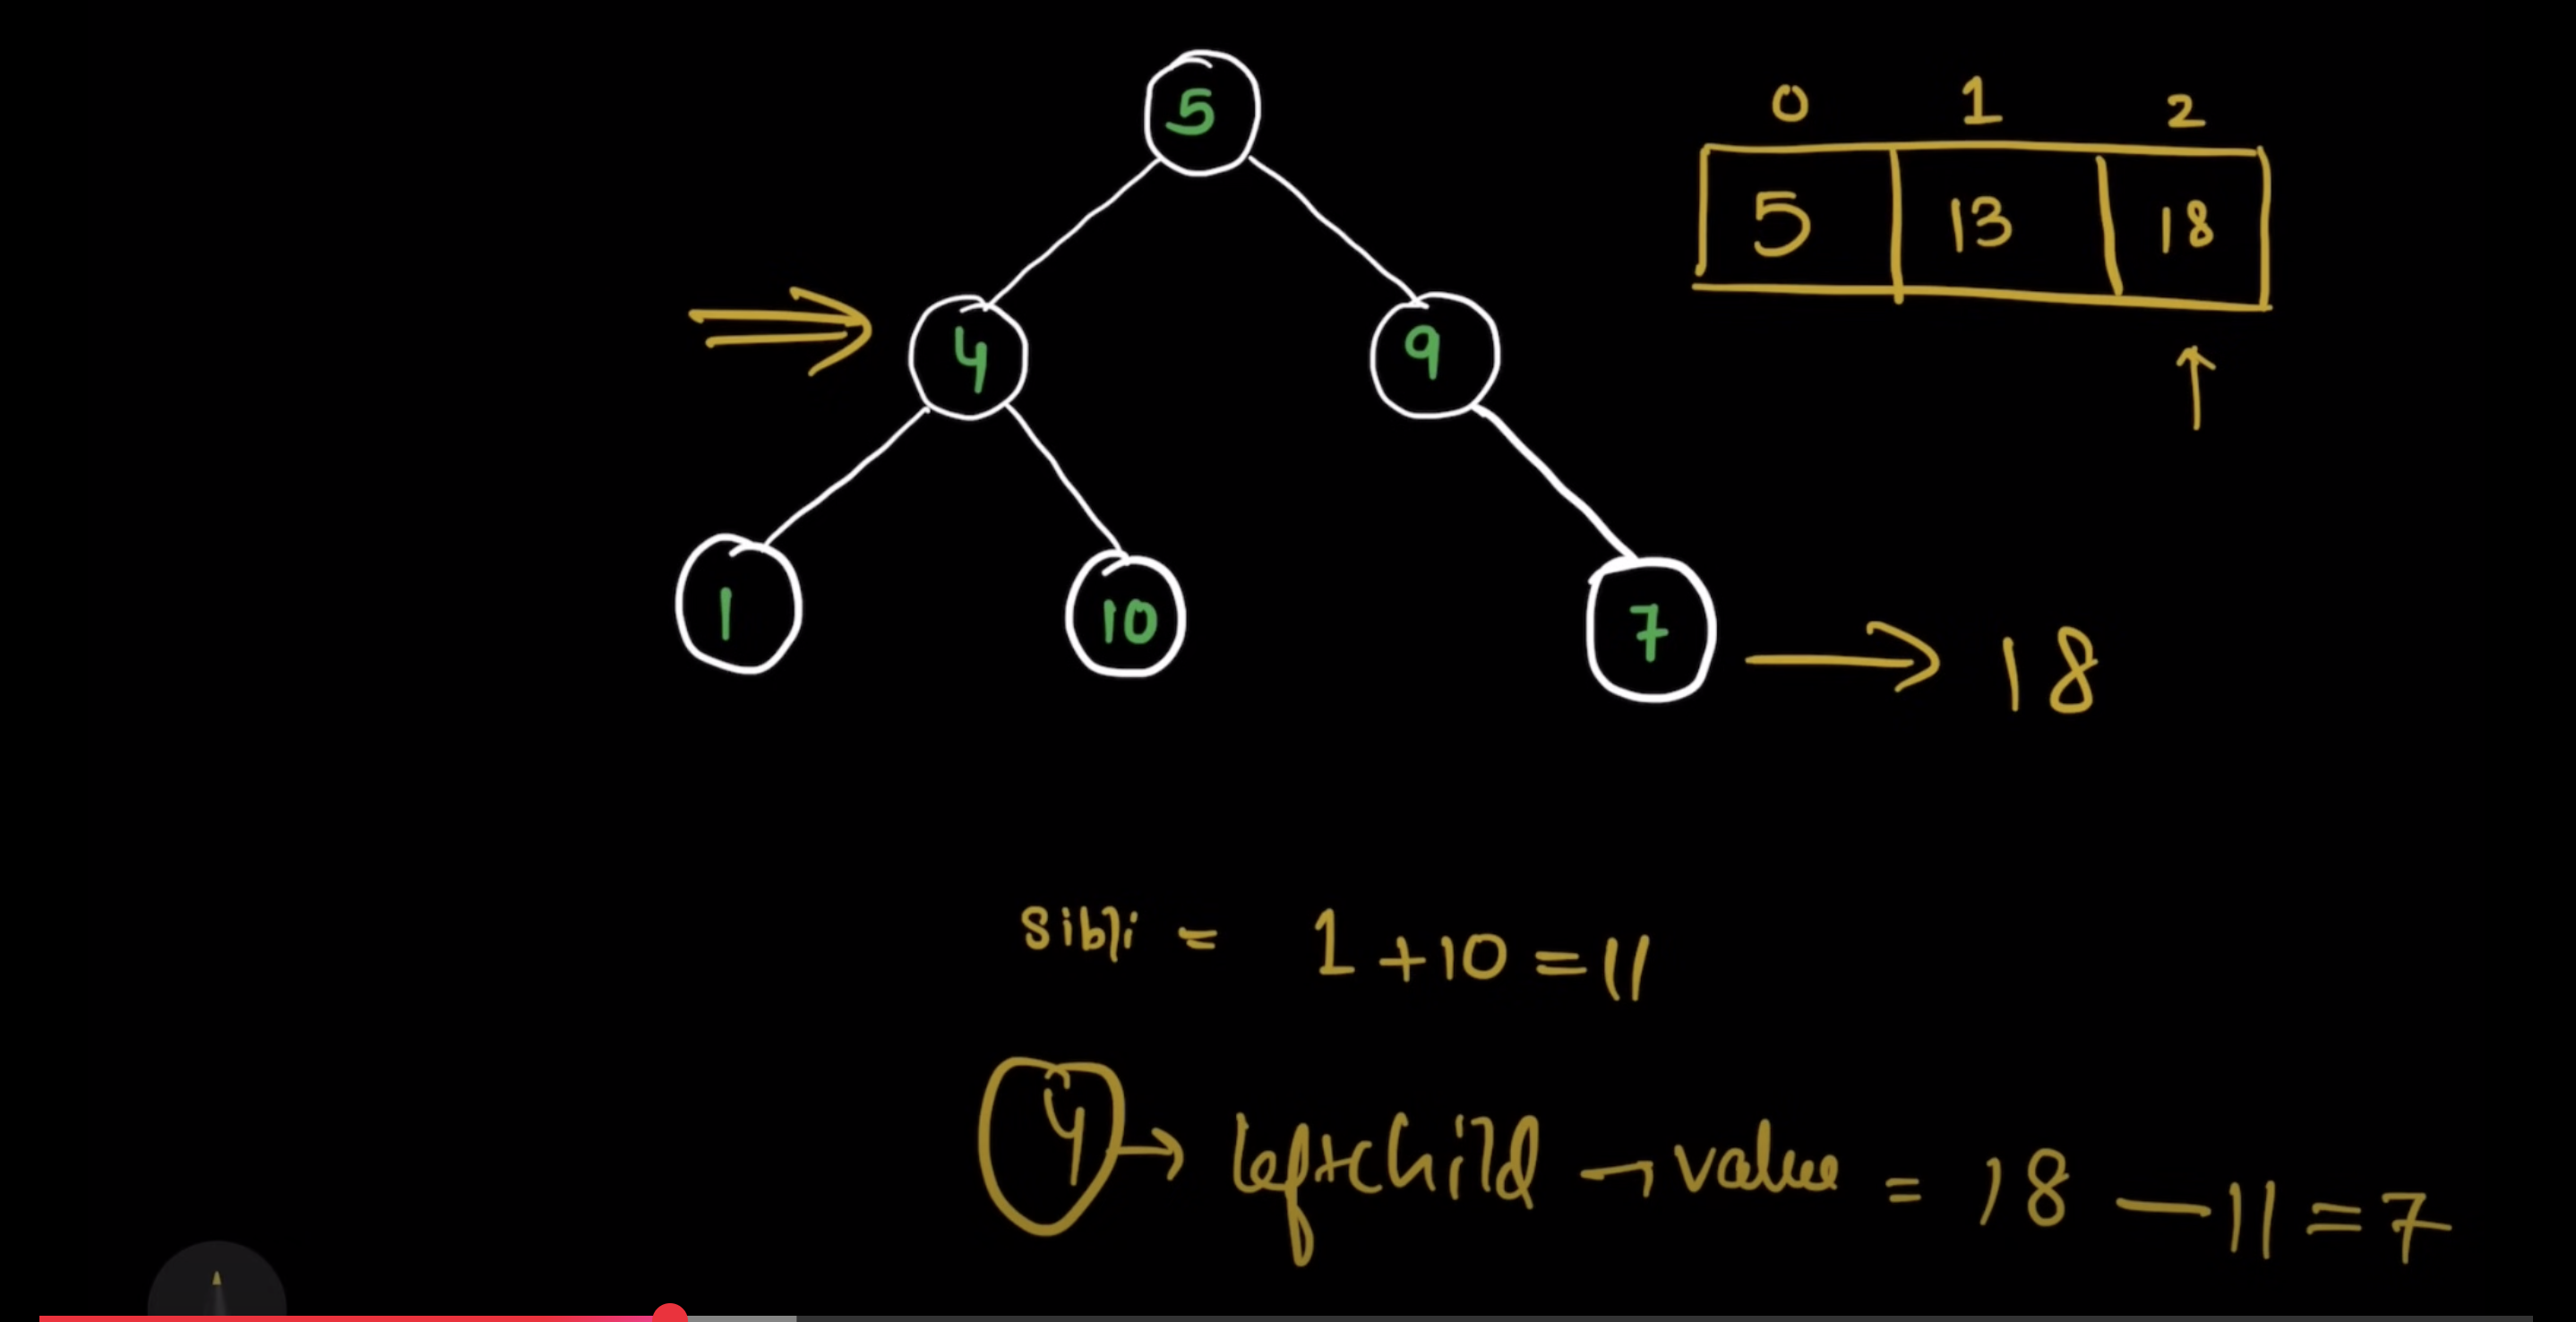

4 pad kadhe khade nikal lo

# Maang

# Part 2, doing in one pass

https://youtu.be/UIrargaZ61M?si=-2Zhq82GyfP_KkcW

In [ ]:
class Solution {
    public:
        TreeNode* replaceValueInTree(TreeNode* root) {
            queue<TreeNode*> q;
            q.push(root);
            vector<int> levelSums;
            while(q.size()){
                int sum=0;
                int n=q.size();
                while(n--){
                    auto node= q.front();
                    q.pop();
                    sum+=node->val;
                    if(node->left){
                        q.push(node->left);
                    }
                    if(node->right){
                        q.push(node->right);
                    }                
                }
                levelSums.push_back(sum);
            }
    
            q.push(root);
            root->val=0;
            int idx=1;
            while(q.size()){
                int n=q.size();
                while(n--){
                    auto node= q.front();
                    q.pop();
                    int childrenSum=(node->left?node->left->val:0) + 
                    (node->right?node->right->val:0);
                    int niblingSum=(node->left or node->right)?levelSums[idx]-childrenSum:0;
                    if(node->left){
                        node->left->val=niblingSum;
                        q.push(node->left);
                    }
                    if(node->right){
                        node->right->val=niblingSum;
                        q.push(node->right);
                    }  
                }
                idx++;
            }
            return root;
        }
    };